In [151]:
import numpy as np
import pandas as pd
import seaborn as sn

from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


#Gathering data and fill NULL data
model = pd.read_csv("Fuel.csv")
model.head()
model.tail()
model.fillna(0)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [152]:
#Data dimension reducing (drop unnecessary fields)
model = pd.DataFrame.drop(model, columns = ["MAKE"], axis = 1)
model = pd.DataFrame.drop(model, columns = ["MODELYEAR", "MODEL", "VEHICLECLASS"], axis = 1)
model = pd.DataFrame.drop(model, columns = ["TRANSMISSION", "CYLINDERS", "TRANSMISSION"], axis = 1)
model = pd.DataFrame.drop(model, columns = ["FUELTYPE"], axis = 1)
model
model.sum()


,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,9.9,6.7,8.5,33,196
1,2.4,11.2,7.7,9.6,29,221
2,1.5,6.0,5.8,5.9,48,136
3,3.5,12.7,9.1,11.1,25,255
4,3.5,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...
1062,3.0,13.4,9.8,11.8,24,271
1063,3.2,13.2,9.5,11.5,25,264
1064,3.0,13.4,9.8,11.8,24,271
1065,3.2,12.9,9.3,11.3,25,260


ENGINESIZE                    3570.5
FUELCONSUMPTION_CITY         14187.4
FUELCONSUMPTION_HWY          10109.4
FUELCONSUMPTION_COMB         12356.8
FUELCONSUMPTION_COMB_MPG     28213.0
CO2EMISSIONS                273396.0
dtype: float64

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,9.9,6.7,8.5,33,196
1,2.4,11.2,7.7,9.6,29,221
2,1.5,6.0,5.8,5.9,48,136
3,3.5,12.7,9.1,11.1,25,255
4,3.5,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...
1062,3.0,13.4,9.8,11.8,24,271
1063,3.2,13.2,9.5,11.5,25,264
1064,3.0,13.4,9.8,11.8,24,271
1065,3.2,12.9,9.3,11.3,25,260


(array([  6.,  12.,  22.,  74., 133., 102., 128., 119., 117., 115.,  49.,
         47.,  53.,  32.,  27.,  15.,  10.,   5.,   0.,   1.]),
 array([108., 127., 146., 165., 184., 203., 222., 241., 260., 279., 298.,
        317., 336., 355., 374., 393., 412., 431., 450., 469., 488.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Histogram of CO2EMISSION')

Text(0.5, 0, '0       196\n1       221\n2       136\n3       255\n4       244\n       ... \n1062    271\n1063    264\n1064    271\n1065    260\n1066    294\nName: CO2EMISSIONS, Length: 1067, dtype: int64')

Text(0, 0.5, 'Frequency')

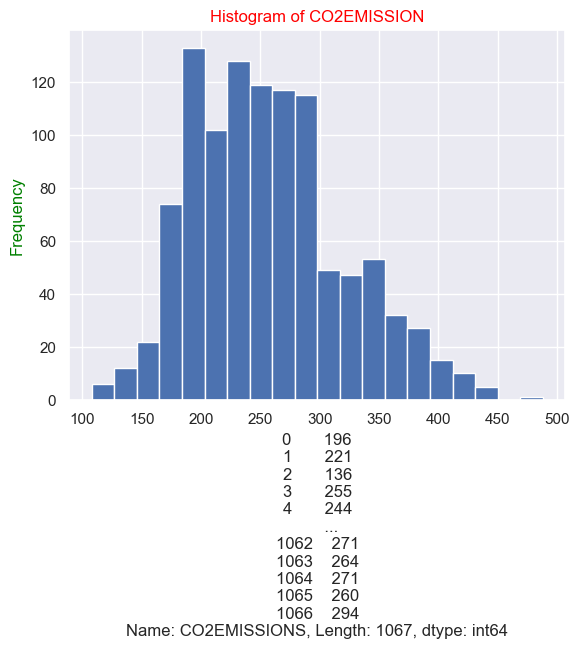

In [153]:
#Logicstic Regression and Fit data

model

sn.set()
plt.hist(model["CO2EMISSIONS"], bins = 20)
plt.title("Histogram of CO2EMISSION", color = "red")
plt.xlabel(model["CO2EMISSIONS"])
plt.ylabel("Frequency", color = "green")
plt.show()



In [147]:
#Test 4 solvers
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, Y = make_classification(n_samples=1067, n_features=19, n_classes = len(set(model['ENGINESIZE'])), n_informative=8)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1000)

solvers = ['newton-cg', 'sag', 'saga', 'lbfgs']
for sol in solvers:
    start = time.time()
    logreg = LogisticRegression(penalty='l2', solver=sol, multi_class='multinomial', max_iter = 100)
    logreg.fit(X_train, y_train)
    end = time.time()
    print(sol + " Fit Time: ",end-start)

d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='newton-cg', tol=1e-10)

newton-cg Fit Time:  0.21337366104125977


d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag', tol=1e-10)

sag Fit Time:  0.09978413581848145


d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-10)

saga Fit Time:  0.12896156311035156


d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', tol=1e-10)

lbfgs Fit Time:  0.1569221019744873


In [143]:
solvers = ['newton-cg', 'sag', 'saga', 'lbfgs']
for sol in solvers:
    start = time.time()
    logreg = LogisticRegression(penalty='l2', solver=sol, multi_class='multinomial', max_iter = 1000)
    logreg.fit(X_train, y_train)
    end = time.time()
    print(sol + " Fit Time: ",end-start)

d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg')

d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


newton-cg Fit Time:  0.11131763458251953


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='sag')

sag Fit Time:  0.18117976188659668


d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

saga Fit Time:  0.40024328231811523


d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

lbfgs Fit Time:  0.11139202117919922


In [144]:
solvers = ['newton-cg', 'sag', 'saga', 'lbfgs']
for sol in solvers:
    start = time.time()
    logreg = LogisticRegression(penalty='l2', solver=sol, multi_class='multinomial', max_iter = 100000)
    logreg.fit(X_train, y_train)
    end = time.time()
    print(sol + " Fit Time: ",end-start)

d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=100000, multi_class='multinomial',
                   solver='newton-cg')

d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


newton-cg Fit Time:  0.11669731140136719


LogisticRegression(max_iter=100000, multi_class='multinomial', solver='sag')

sag Fit Time:  0.2282872200012207


d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=100000, multi_class='multinomial', solver='saga')

saga Fit Time:  0.419893741607666


d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=100000, multi_class='multinomial')

lbfgs Fit Time:  0.12646150588989258


In [148]:
solvers = ['newton-cg', 'sag', 'saga', 'lbfgs']
for sol in solvers:
    start = time.time()
    logreg = LogisticRegression(penalty='l2', solver=sol, multi_class='multinomial', tol = 1e-6, max_iter = 1000)
    logreg.fit(X_train, y_train)
    end = time.time()
    print(sol + " Fit Time: ",end-start)

d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg',
                   tol=1e-06)

d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


newton-cg Fit Time:  0.11500859260559082


d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='sag',
                   tol=1e-06)

d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


sag Fit Time:  0.40613460540771484


d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga',
                   tol=1e-06)

d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


saga Fit Time:  0.7586967945098877


LogisticRegression(max_iter=1000, multi_class='multinomial', tol=1e-06)

lbfgs Fit Time:  0.2605905532836914


In [149]:
solvers = ['newton-cg', 'sag', 'saga', 'lbfgs']
for sol in solvers:
    start = time.time()
    logreg = LogisticRegression(penalty='l2', solver=sol, multi_class='multinomial', tol = 1e-8, max_iter = 100000)
    logreg.fit(X_train, y_train)
    end = time.time()
    print(sol + " Fit Time: ",end-start)

d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=100000, multi_class='multinomial',
                   solver='newton-cg', tol=1e-08)

d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


newton-cg Fit Time:  0.1761786937713623


LogisticRegression(max_iter=100000, multi_class='multinomial', solver='sag',
                   tol=1e-08)

sag Fit Time:  4.422237873077393


d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=100000, multi_class='multinomial', solver='saga',
                   tol=1e-08)

saga Fit Time:  17.581817388534546


d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=100000, multi_class='multinomial', tol=1e-08)

lbfgs Fit Time:  0.5154275894165039


In [150]:
solvers = ['newton-cg', 'sag', 'saga', 'lbfgs']
for sol in solvers:
    start = time.time()
    logreg = LogisticRegression(penalty='l2', solver=sol, multi_class='multinomial', tol = 1e-9, max_iter = 100000)
    logreg.fit(X_train, y_train)
    end = time.time()
    print(sol + " Fit Time: ",end-start)

d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=100000, multi_class='multinomial',
                   solver='newton-cg', tol=1e-09)

newton-cg Fit Time:  0.2000274658203125


d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=100000, multi_class='multinomial', solver='sag',
                   tol=1e-09)

sag Fit Time:  6.038296461105347


d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=100000, multi_class='multinomial', solver='saga',
                   tol=1e-09)

saga Fit Time:  24.758562803268433


d:\IDE\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=100000, multi_class='multinomial', tol=1e-09)

lbfgs Fit Time:  0.236372709274292
